In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
BikeRentalData=pd.read_csv('BikeRentalData.csv',encoding='latin')
print('Shape before dropping duplicate values',BikeRentalData.shape)

BikeRentalData= BikeRentalData.drop_duplicates()

print('Shape after dropping duplicate values',BikeRentalData.shape)

Shape before dropping duplicate values (17379, 14)
Shape after dropping duplicate values (17377, 14)


In [3]:
BikeRentalData.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1


## •	Defining the problem statement

Create a ML model which can predict the number of bikes which will be rented at a given hour of the day

Target Variable: cnt
    
Predictors: holiday, weather, registered users etc.

<AxesSubplot:>

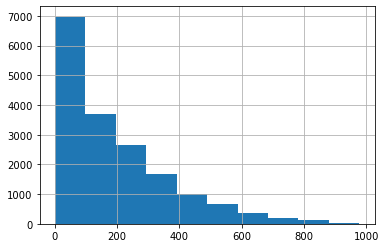

In [4]:
BikeRentalData['cnt'].hist()

In [5]:
BikeRentalData.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1


In [6]:
BikeRentalData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17377 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17377 non-null  int64  
 1   yr          17377 non-null  int64  
 2   mnth        17377 non-null  int64  
 3   hr          17377 non-null  int64  
 4   holiday     17377 non-null  int64  
 5   weekday     17377 non-null  int64  
 6   workingday  17377 non-null  int64  
 7   weathersit  17377 non-null  int64  
 8   temp        17377 non-null  float64
 9   atemp       17377 non-null  float64
 10  hum         17377 non-null  float64
 11  windspeed   17377 non-null  float64
 12  registered  17377 non-null  int64  
 13  cnt         17377 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 2.0 MB


In [7]:
BikeRentalData.describe(include='all')

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
count,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000
mean,2.501525,0.502561,6.537435,11.547505,0.028774,3.003568,0.682742,1.425332,0.496993,0.475780,0.627216,0.190108,153.803649,189.483916
std,1.106917,0.500008,3.438722,6.914438,0.167175,2.005744,0.465422,0.639377,0.192553,0.171849,0.192935,0.122343,151.357913,181.387645
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,886.000000,977.000000


In [8]:
BikeRentalData.nunique()

season          4
yr              2
mnth           12
hr             24
holiday         2
weekday         7
workingday      2
weathersit      4
temp           50
atemp          65
hum            89
windspeed      30
registered    776
cnt           869
dtype: int64

season: Categorical. Selected.
    
yr: Qualitative. Rejected. The year value is like an ID just for reference.
    
mnth: Categorical. Selected.

hr: Categorical. Selected.
    
holiday: Categorical. Selected.
    
weekday: Categorical. Selected.
    
workingday: Categorical. Selected.
    
weathersit: Categorical. Selected.
    
temp: Continuous. Selected.
    
atemp: Continuous. Selected.
    
hum: Continuous. Selected.
    
windspeed: Continuous. Selected.
    
casual: Continuous. Selected.
    
registered: Continuous. Selected.
    
cnt: Continuous. Selected.This is the Target Variable!

In [9]:
BikeRentalData.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1


## Removing useless columns from the data

In [10]:
UselessColumns = ['yr']
BikeRentalData = BikeRentalData.drop(UselessColumns,axis=1)
BikeRentalData.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,13,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,32,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,27,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,10,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1


## Visual Exploratory Data Analysis
•Categorical variables: Bar plot
    
•Continuous variables: Histogram
Visualize distribution of all the Categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.
Based on the Basic Data Exploration above, we have spotted three categorical predictors in the data


## Categorical Predictors: 'season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit'

In [11]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

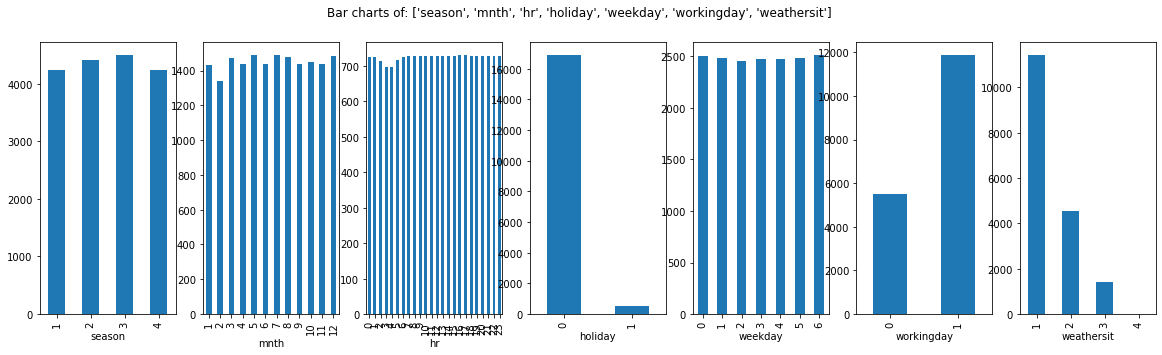

In [12]:
PlotBarCharts(inpData=BikeRentalData, colsToPlot=[
    'season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit'])

array([[<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>],
       [<AxesSubplot:title={'center':'hum'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'registered'}>, <AxesSubplot:>]],
      dtype=object)

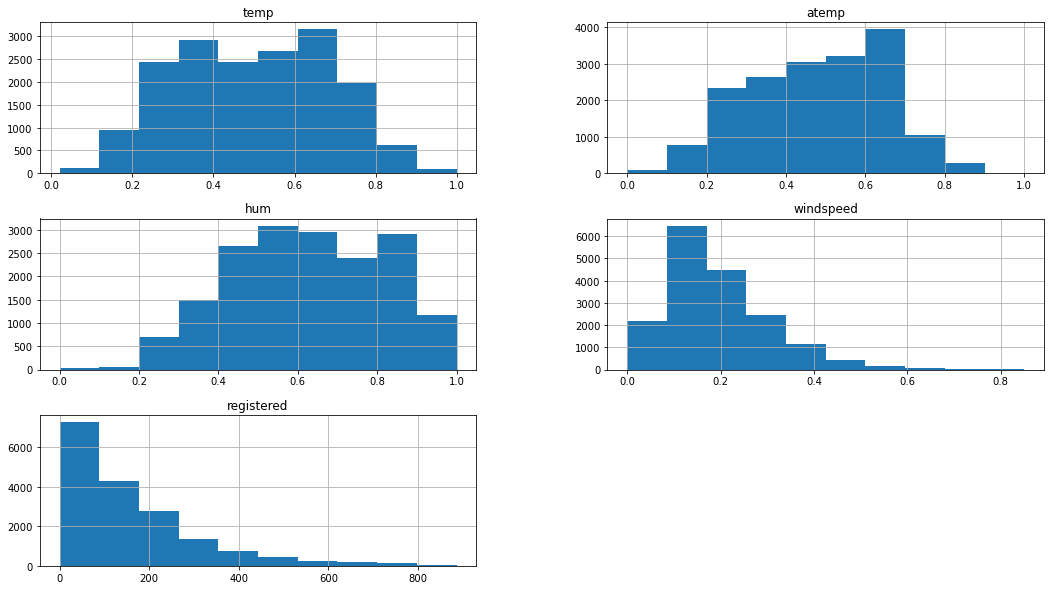

In [13]:
BikeRentalData.hist(['temp','atemp','hum','windspeed','registered'], figsize=(18,10))

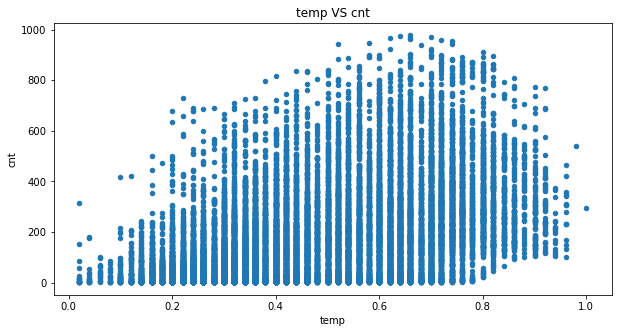

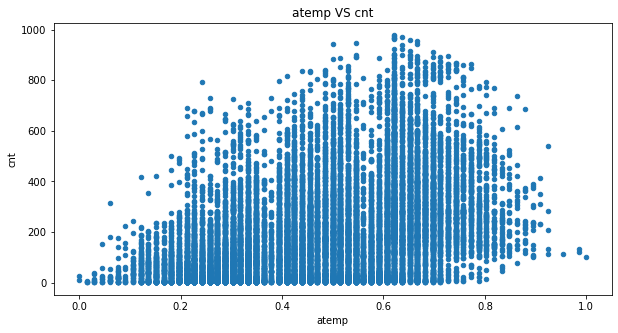

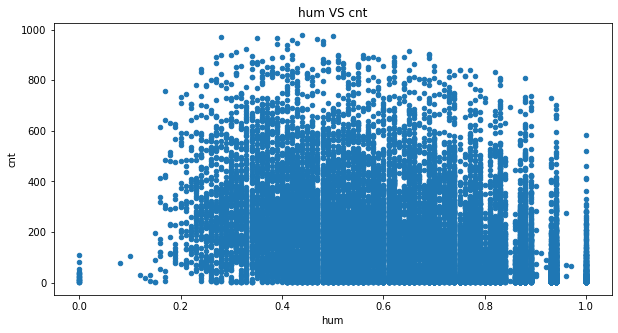

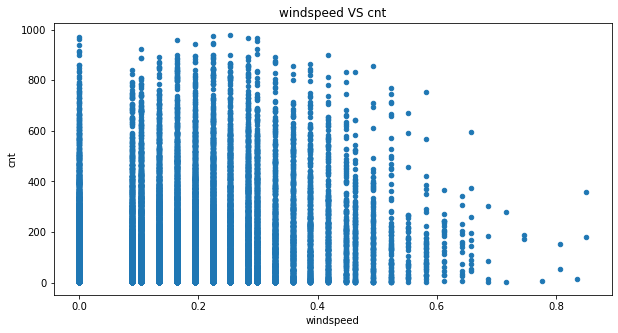

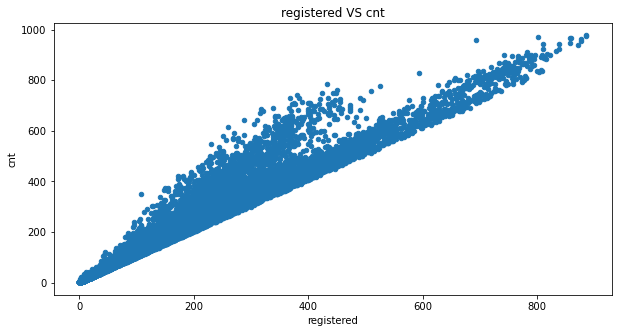

In [14]:
ContinuousCols=['temp','atemp','hum','windspeed','registered']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    BikeRentalData.plot.scatter(x=predictor, y='cnt', figsize=(10,5), title=predictor+" VS "+ 'cnt')

In [15]:
# Calculating correlation matrix
ContinuousCols=['cnt','temp','atemp','hum','windspeed','registered']

# Creating the correlation matrix
CorrelationData=BikeRentalData[ContinuousCols].corr()
CorrelationData

,cnt,temp,atemp,hum,windspeed,registered
cnt,1.000000,0.404798,0.400950,-0.322872,0.093155,0.972148
temp,0.404798,1.000000,0.987671,-0.069931,-0.023141,0.335377
atemp,0.400950,0.987671,1.000000,-0.051960,-0.062357,0.332571
hum,-0.322872,-0.069931,-0.051960,1.000000,-0.290070,-0.273891
windspeed,0.093155,-0.023141,-0.062357,-0.290070,1.000000,0.082244
registered,0.972148,0.335377,0.332571,-0.273891,0.082244,1.000000


In [16]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['cnt'][abs(CorrelationData['cnt']) > 0.5 ]

cnt           1.000000
registered    0.972148
Name: cnt, dtype: float64

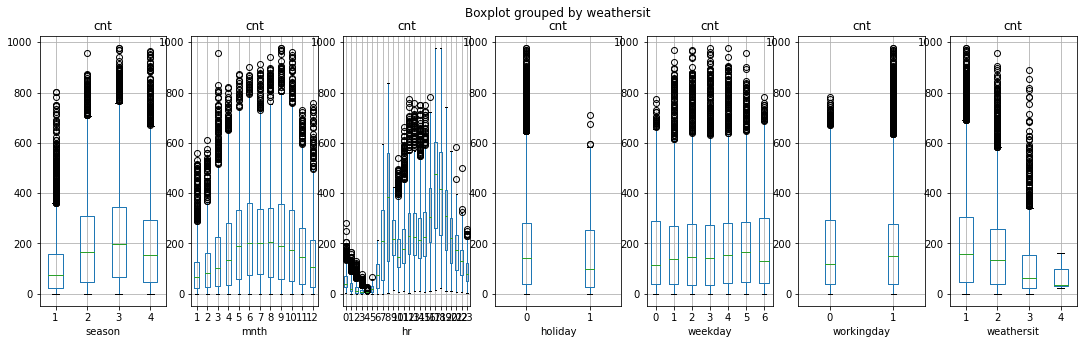

In [17]:
# Box plots for Categorical Target Variable "cnt" and continuous predictors
CategoricalColsList=['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "cnt"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    BikeRentalData.boxplot(column='cnt', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])


In [18]:
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [19]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
FunctionAnova(inpData=BikeRentalData, 
              TargetVariable='cnt', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

season is correlated with cnt | P-Value: 5.106220835895279e-257
mnth is correlated with cnt | P-Value: 5.2484657372432516e-284
hr is correlated with cnt | P-Value: 0.0
holiday is correlated with cnt | P-Value: 4.495359698010671e-05
weekday is correlated with cnt | P-Value: 0.0018766923121991564
workingday is correlated with cnt | P-Value: 6.675147740900618e-05
weathersit is correlated with cnt | P-Value: 1.4485803474430875e-81


['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

In [20]:
SelectedColumns=['registered','season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

# Selecting final columns
DataForML=BikeRentalData[SelectedColumns]
DataForML.head()

,registered,season,mnth,hr,holiday,weekday,workingday,weathersit
0,13,1,1,0,0,6,0,1
1,32,1,1,1,0,6,0,1
2,27,1,1,2,0,6,0,1
3,10,1,1,3,0,6,0,1
4,1,1,1,4,0,6,0,1


In [21]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

In [22]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['cnt']=BikeRentalData['cnt']

# Printing sample rows
DataForML_Numeric.head()

,registered,season,mnth,hr,holiday,weekday,workingday,weathersit,cnt
0,13,1,1,0,0,6,0,1,16
1,32,1,1,1,0,6,0,1,40
2,27,1,1,2,0,6,0,1,32
3,10,1,1,3,0,6,0,1,13
4,1,1,1,4,0,6,0,1,1


In [23]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['registered', 'season', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'cnt'],
      dtype='object')

In [24]:
TargetVariable='cnt'
Predictors=['registered', 'season', 'mnth', 'hr', 'holiday',
       'weekday', 'workingday', 'weathersit']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12163, 8)
(12163,)
(5214, 8)
(5214,)


In [27]:
from sklearn import metrics
import pickle
def predict(ml_model,dump):
    model=ml_model.fit(X_train,y_train)
    print('Training Score:{}'.format(model.score(X_train,y_train)))
    
    predictions=model.predict(X_test)
    print('Predictions are: {}'.format(predictions))
    
    print('\n')
    
    r2_score=metrics.r2_score(y_test,predictions)
    print('r2 score is :{}'.format(r2_score))
    
    print('MAE',metrics.mean_absolute_error(y_test,predictions))
    print('MSE',metrics.mean_squared_error(y_test,predictions))
    print('RMS',np.sqrt(metrics.mean_absolute_error(y_test,predictions)))
    

    sns.distplot(y_test-predictions)
    
    
    if dump==1:
        file=open('D:\Data Analyst courses\Data Analysis Projects\Regression Use Cases\Diamond price prediction/DataForML.pkl','wb')
        pickle.dump(model,file)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

Training Score:0.956816330876403
Predictions are: [349.88235814 758.04875766 226.80931481 ... 423.88528553 164.93937453
 281.2413045 ]


r2 score is :0.9569842294466583
MAE 25.053475291331853
MSE 1322.642887297011
RMS 5.005344672580686


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


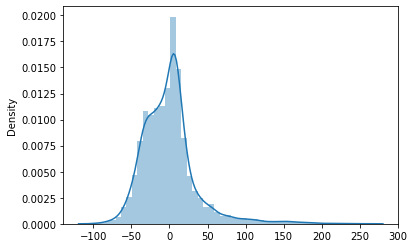

In [29]:
#Passed 0 bec. model dump nhi karna h
predict(LinearRegression(),0)

Training Score:0.999942772294269
Predictions are: [339. 770. 211. ... 532. 268. 273.]


r2 score is :0.980258044342239
MAE 13.712952307889019
MSE 607.0228870988363
RMS 3.7031003642743765


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


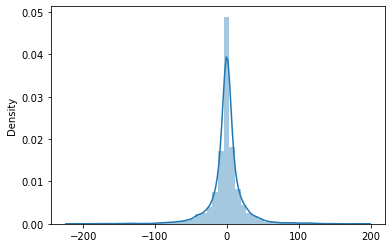

In [30]:
#Passed 0 bec. model dump nhi karna h
predict(DecisionTreeRegressor(),0)

Training Score:0.9984221220730084
Predictions are: [336.59 735.19 209.98 ... 503.09 200.37 285.05]


r2 score is :0.9895614195859809
MAE 10.324943118579627
MSE 320.9640083271211
RMS 3.2132449515372503


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


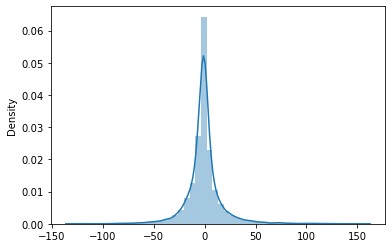

In [31]:
#Passed 0 bec. model dump nhi karna h
predict(RandomForestRegressor(),0)

Training Score:0.9798796164458672
Predictions are: [318.  775.2 151.4 ... 491.2 144.8 249.6]


r2 score is :0.9678104316804856
MAE 21.16217874952052
MSE 989.7603375527427
RMS 4.600236814504284


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


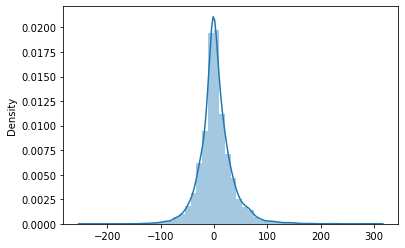

In [32]:
#Passed 0 bec. model dump nhi karna h
predict(KNeighborsRegressor(),0)

Training Score:0.9455138222296384
Predictions are: [394.29346314 733.69727891 257.02171946 ... 492.94761106 215.2467459
 341.60417297]


r2 score is :0.940687519957939
MAE 34.361957035038806
MSE 1823.7318278024782
RMS 5.861907286458803


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


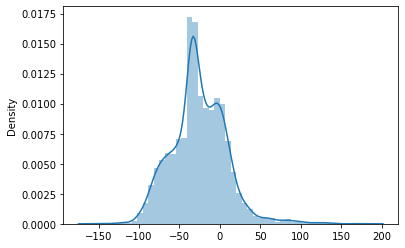

In [33]:
from sklearn.ensemble import AdaBoostRegressor
#Passed 0 bec. model dump nhi karna h
predict(AdaBoostRegressor(),0)

Training Score:0.9961083020098052
Predictions are: [339.32797 728.8863  206.04796 ... 509.23212 191.53539 313.06516]


r2 score is :0.9904687222208601
MAE 9.970467008190179
MSE 293.06639400539655
RMS 3.157604631392312


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


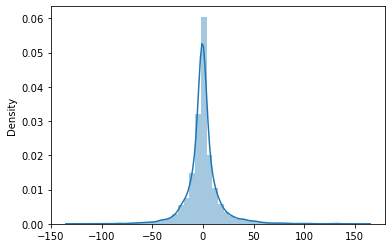

In [34]:
from xgboost import XGBRegressor
#Passed 0 bec. model dump nhi karna h
predict(XGBRegressor(),0)